Hamiltonian Matrix:
[[ 1.   0.5]
 [ 0.5 -1. ]]

Eigenvalues:
[-1.11803399  1.11803399]

Quantum Circuit:
     ┌───────┐┌─┐
  q: ┤ Rz(π) ├┤M├
     └───────┘└╥┘
c: 1/══════════╩═
               0 

Measurement counts:
{'0': 1024}


C:\Users\amand\AppData\Local\Temp\ipykernel_12360\2219623670.py:41: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


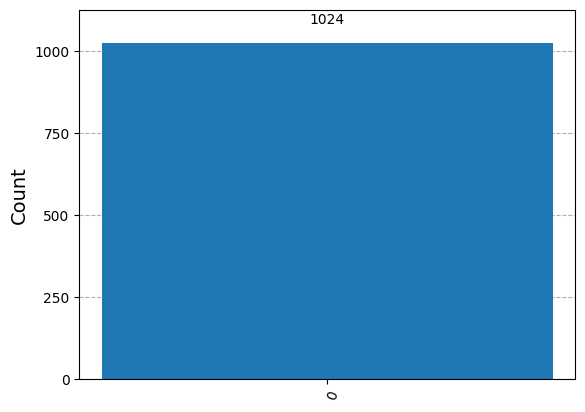

In [9]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from scipy.linalg import eigh

# Define the Hamiltonian as a matrix
hamiltonian = np.array([[1, 0.5], [0.5, -1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(hamiltonian)

# Print the Hamiltonian matrix and its eigenvalues
print("Hamiltonian Matrix:")
print(hamiltonian)
print("\nEigenvalues:")
print(eigenvalues)

# Construct a quantum circuit
qc = QuantumCircuit(1, 1)  # One qubit and one classical bit for measurement

# Apply gates based on Hamiltonian (for simple cases like 2x2 Hamiltonians)
# For illustration purposes, we'll use an RZ gate as a placeholder
qc.rz(2 * np.pi * 0.5, 0)  # Rotate Z by an angle related to matrix elements

# Add measurement
qc.measure(0, 0)

# Print the quantum circuit
print("\nQuantum Circuit:")
print(qc.draw())

# Transpile the circuit for a specific backend (use 'qasm_simulator' as the target)
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, backend)

# Convert the transpiled circuit to a format suitable for simulation
qobj = assemble(transpiled_circuit, shots=1024)

# Simulate the transpiled circuit
result = backend.run(qobj).result()
counts = result.get_counts()

# Print the measurement counts
print("\nMeasurement counts:")
print(counts)

# Optional: Plot the counts as a histogram
plot_histogram(counts)

Hamiltonian Matrix:
[[ 1.   0.5]
 [ 0.5 -1. ]]

Eigenvalues:
[-1.11803399  1.11803399]

Quantum Circuit:
                  ┌───┐                                                »
q_0: ─────────────┤ H ├───────────────■────────────────────────────────»
                  ├───┤               │                                »
q_1: ─────────────┤ H ├───────────────┼──────■─────────────────────────»
                  ├───┤               │      │                         »
q_2: ─────────────┤ H ├───────────────┼──────┼────────■────────────────»
                  ├───┤               │      │        │                »
q_3: ─────────────┤ H ├───────────────┼──────┼────────┼────────■───────»
     ┌────────────┴───┴─────────────┐ │P(π)  │P(π/2)  │P(π/4)  │P(π/8) »
q_4: ┤ Initialize(0.22975,-0.97325) ├─■──────■────────■────────■───────»
     └──────────────────────────────┘                                  »
c: 4/══════════════════════════════════════════════════════════════════»
                   

C:\Users\amand\AppData\Local\Temp\ipykernel_12360\3081097070.py:56: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


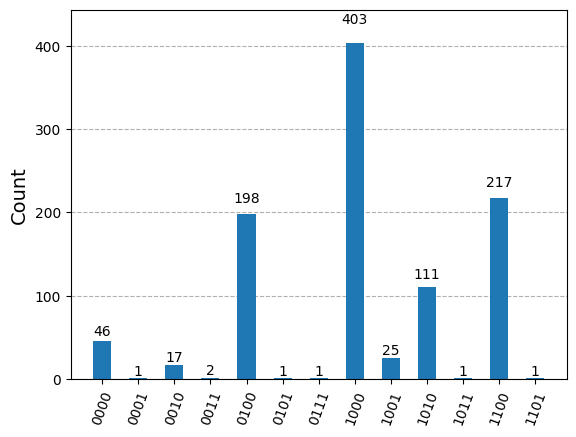

In [10]:
import numpy as np
from qiskit import QuantumCircuit,  transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from scipy.linalg import eigh
from qiskit_aer import Aer

# Define the Hamiltonian as a matrix (e.g., 2x2 Pauli-X and Z combination)
hamiltonian = np.array([[1, 0.5], [0.5, -1]])

# Compute eigenvalues and eigenvectors (for comparison purposes)
eigenvalues, eigenvectors = eigh(hamiltonian)

# Print the Hamiltonian matrix and its eigenvalues
print("Hamiltonian Matrix:")
print(hamiltonian)
print("\nEigenvalues:")
print(eigenvalues)

# Quantum Phase Estimation Circuit
num_qubits = 4  # Number of qubits in the estimation register
ancilla_qubits = 1  # One qubit for the eigenstate

# Create a quantum circuit with qubits for phase estimation and the ancilla qubit
qc = QuantumCircuit(num_qubits + ancilla_qubits, num_qubits)

# Prepare the initial state (using the first eigenvector for simplicity)
initial_state = eigenvectors[:, 0]  # Taking the first eigenvector
qc.initialize(initial_state, num_qubits)  # Initialize the ancilla qubit in the eigenvector state

# Apply Hadamard gates to the first num_qubits qubits (the estimation register)
qc.h(range(num_qubits))

# Controlled Unitary operations (for simplicity, we assume a Pauli-Z rotation as a placeholder)
for qubit in range(num_qubits):
    qc.cp(2 * np.pi / (2 ** (qubit + 1)), qubit, num_qubits)

# Apply inverse Quantum Fourier Transform (QFT) to the estimation register
qc.append(QFT(num_qubits, inverse=True), range(num_qubits))

# Measure the estimation register
qc.measure(range(num_qubits), range(num_qubits))

# Print the quantum circuit
print("\nQuantum Circuit:")
print(qc.draw())

# Transpile the circuit for a specific backend
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, backend)

# Assemble the transpiled circuit into a qobj (quantum object) suitable for simulation
qobj = assemble(transpiled_circuit, backend, shots=1024)

# Run the circuit on the simulator
result = backend.run(qobj).result()
counts = result.get_counts()

# Print the measurement results
print("\nMeasurement counts:")
print(counts)

# Plot the counts as a histogram
plot_histogram(counts)
